In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
walmart_df = pd.read_csv("Walmart_sales.csv")
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
import numpy as np
len(np.unique(walmart_df['Store']))

45

In [6]:
walmart_df.corr(numeric_only=True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [7]:
walmart_df['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [8]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')

walmart_df['Day']= walmart_df['Date'].dt.day


walmart_df['Month']= walmart_df['Date'].dt.month
walmart_df['Year']= walmart_df['Date'].dt.year

In [9]:
walmart_df['Year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int64

## EDA

In [10]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [11]:
walmart_numeric = walmart_df.select_dtypes(include='number')


In [12]:
walmart_numeric

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [13]:
correlations = walmart_numeric.corr()

<Axes: >

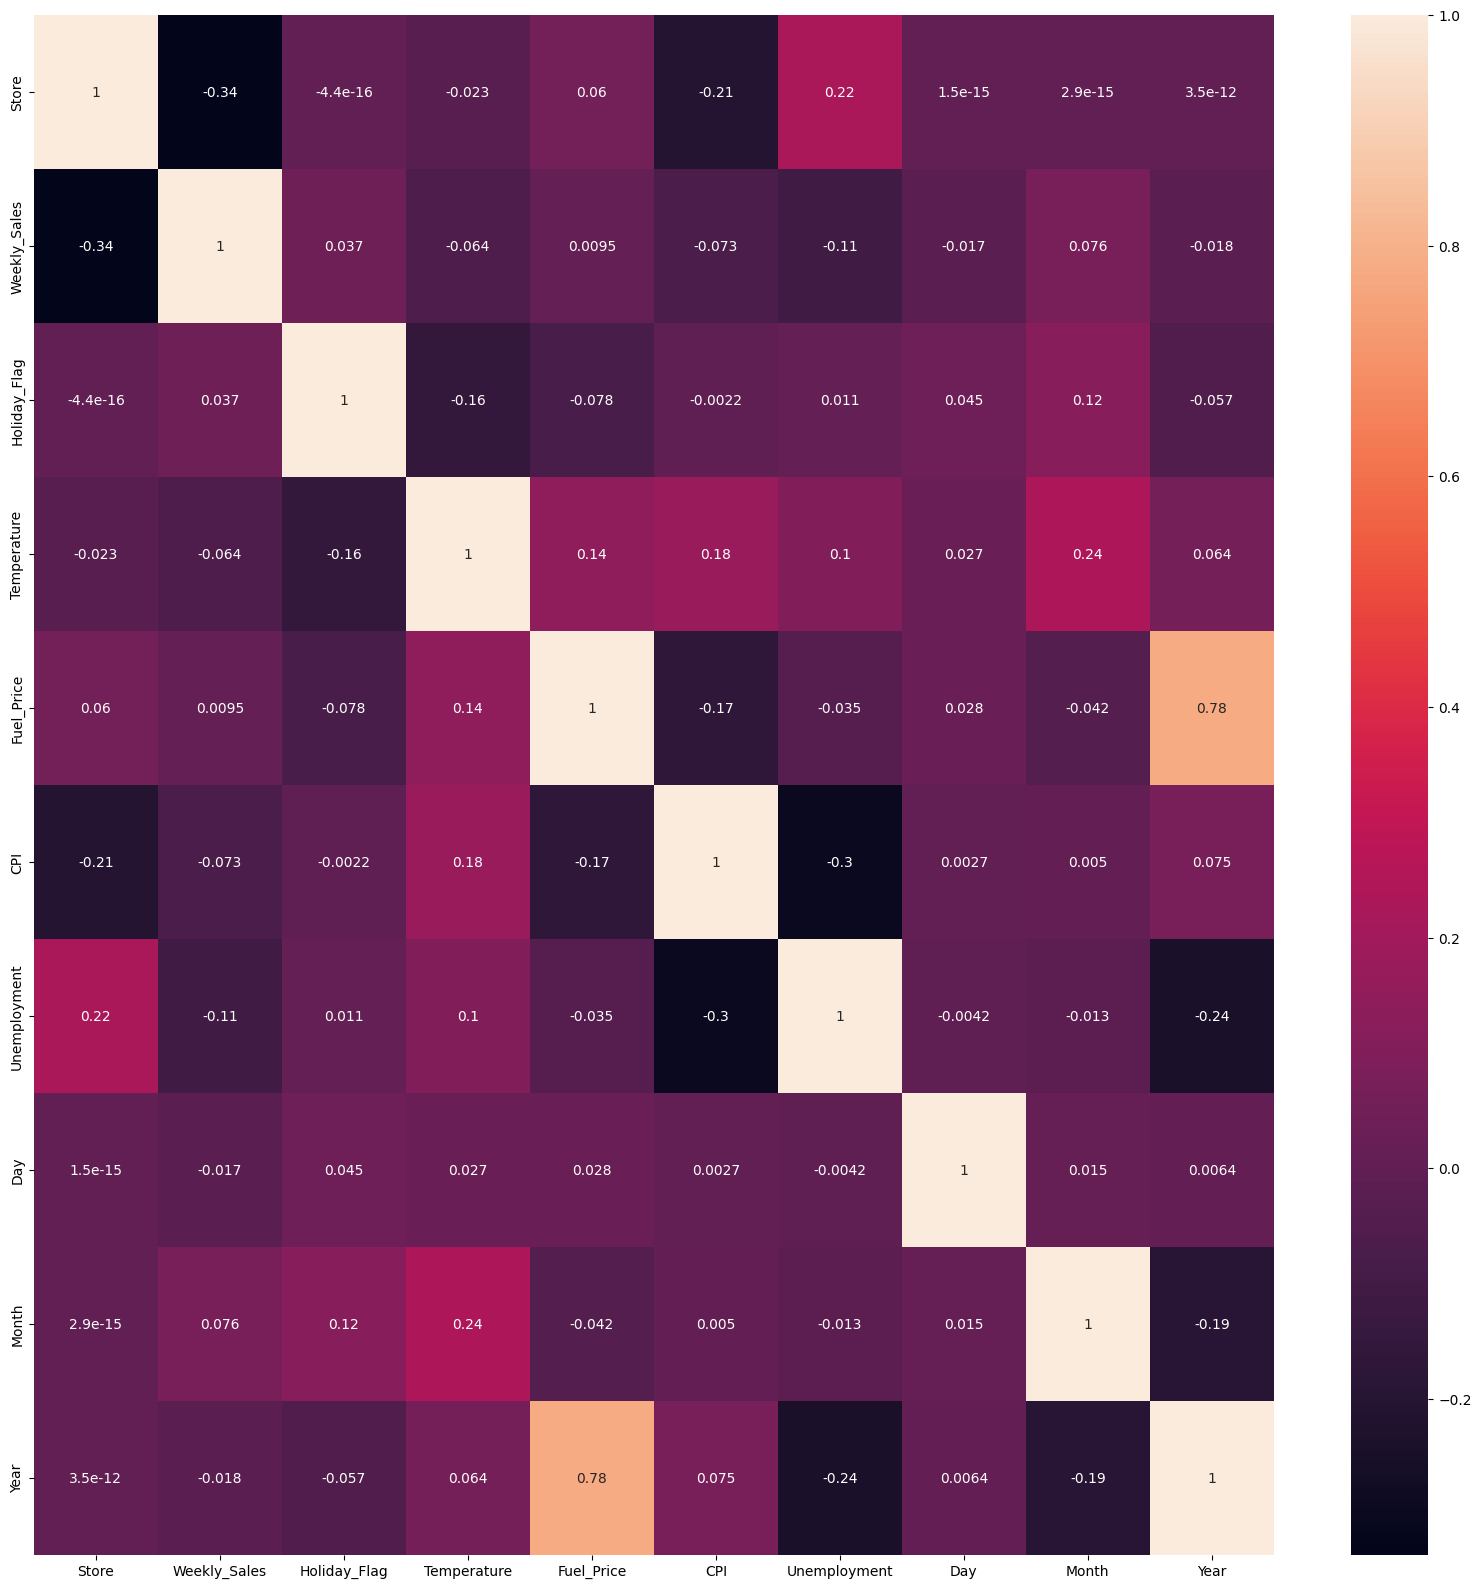

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

Text(0.5, 1.0, 'Distribution of Weekly Sales')

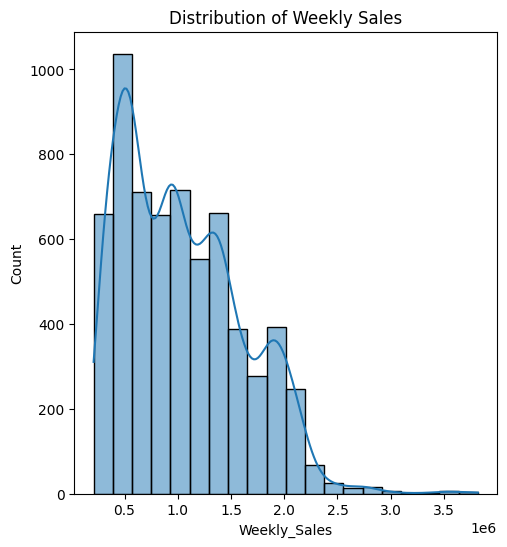

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(walmart_df['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')

<Figure size 2000x2000 with 0 Axes>

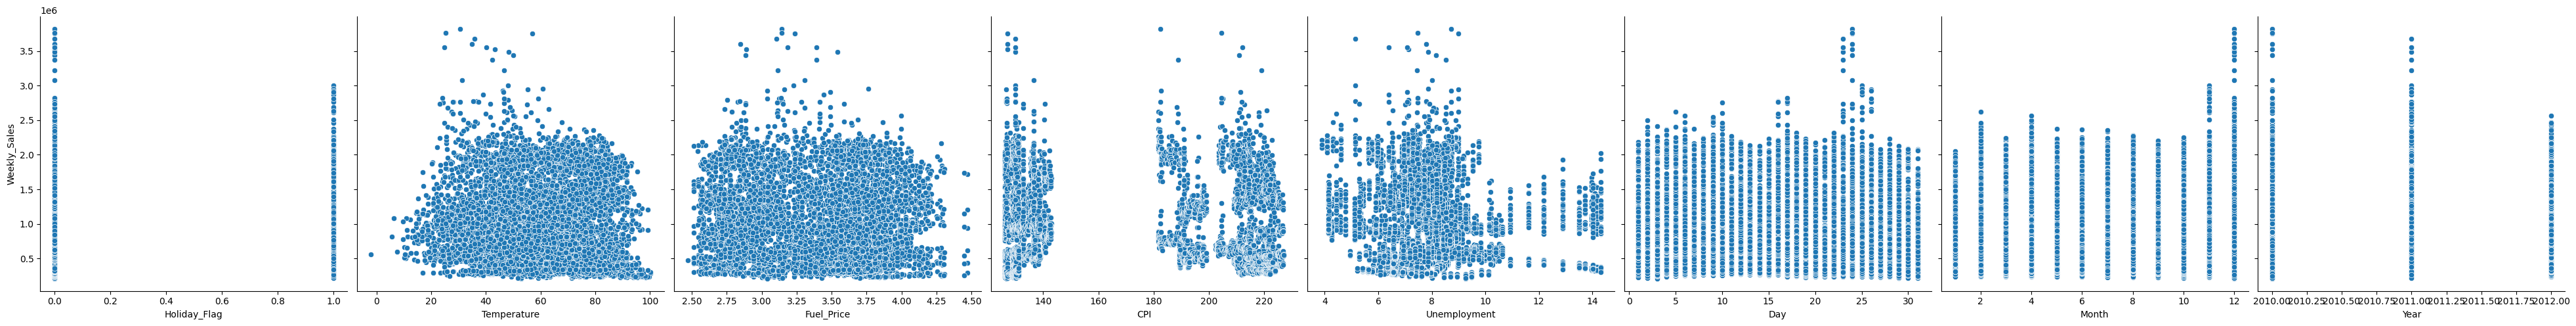

In [16]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=walmart_df, x_vars=['Holiday_Flag', 'Temperature', 
                                      'Fuel_Price', 'CPI', 'Unemployment',
                                      'Day', 'Month', 'Year'], 
             y_vars=['Weekly_Sales'], kind='scatter', height=5)
plt.show()

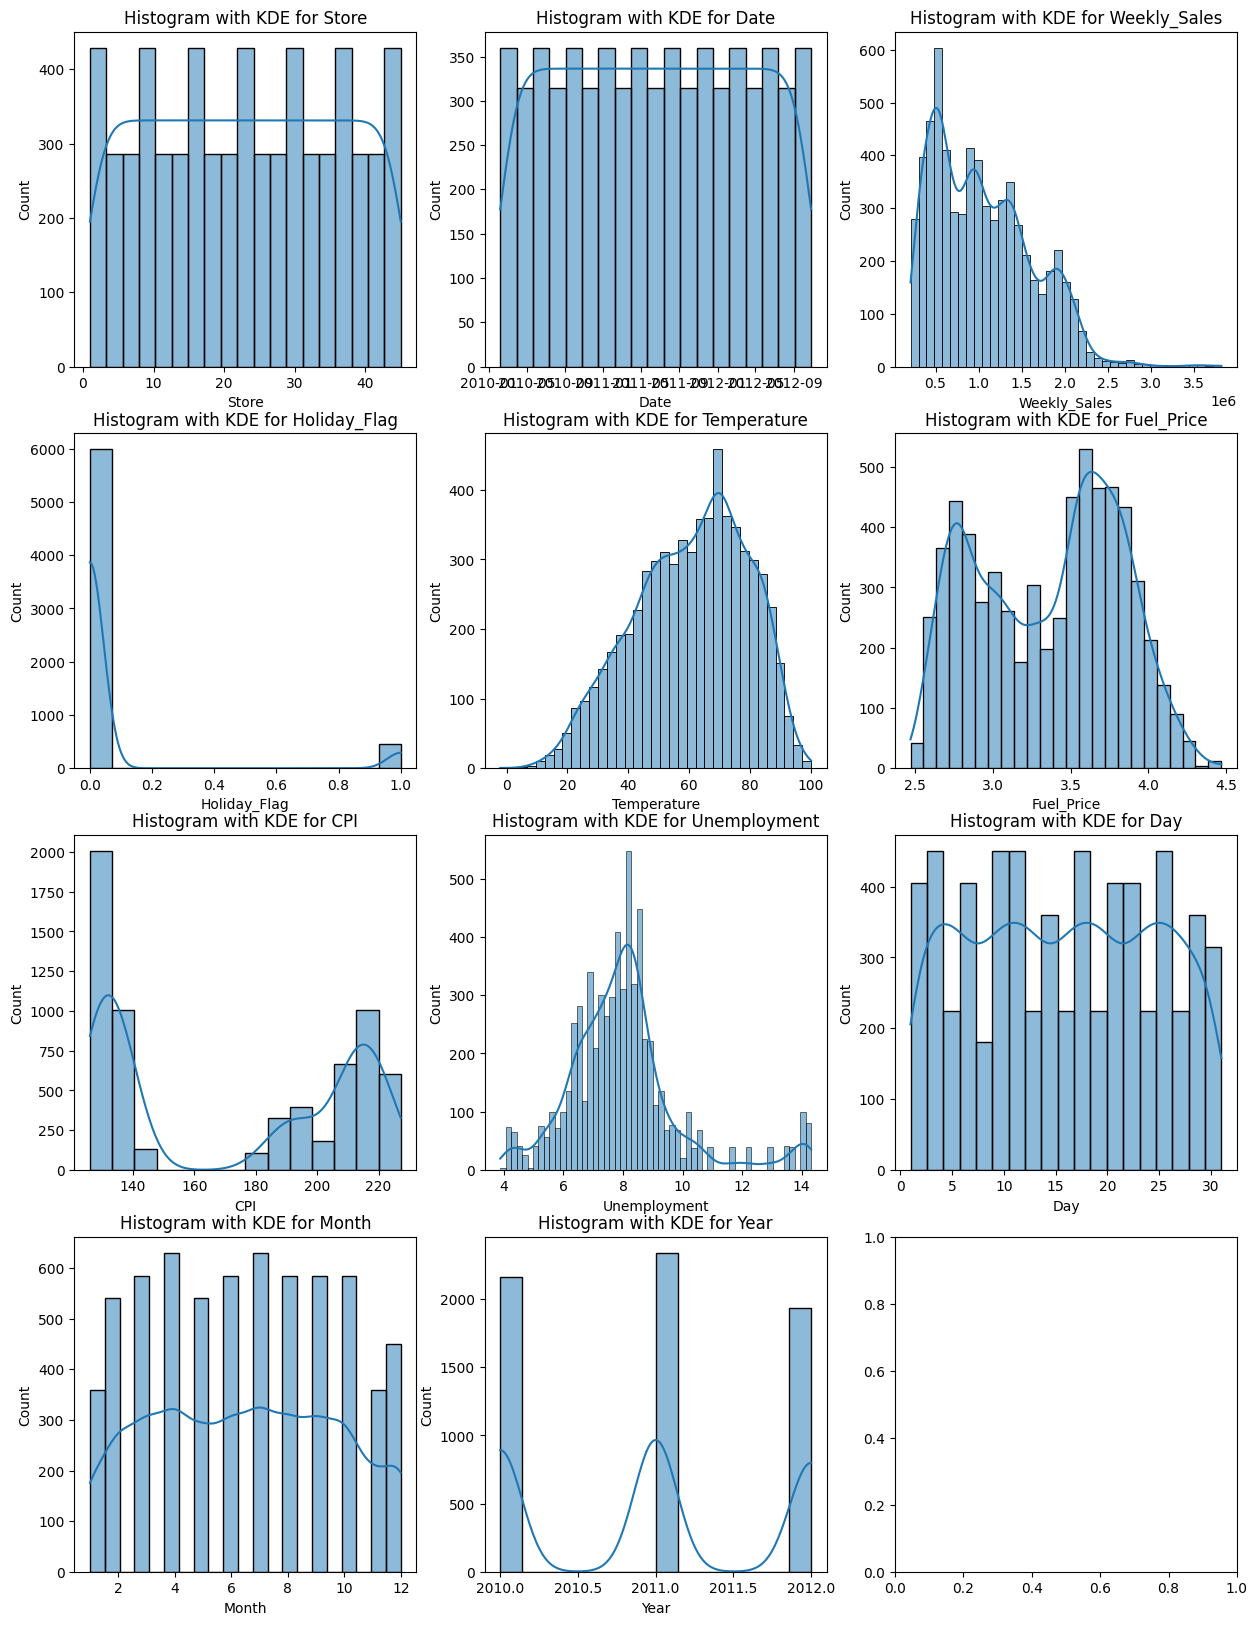

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
num_cols = 3
num_rows = (len(walmart_df.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(walmart_df.columns):

    sns.histplot(walmart_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with KDE for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.show()

In [18]:
store_sales = walmart_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

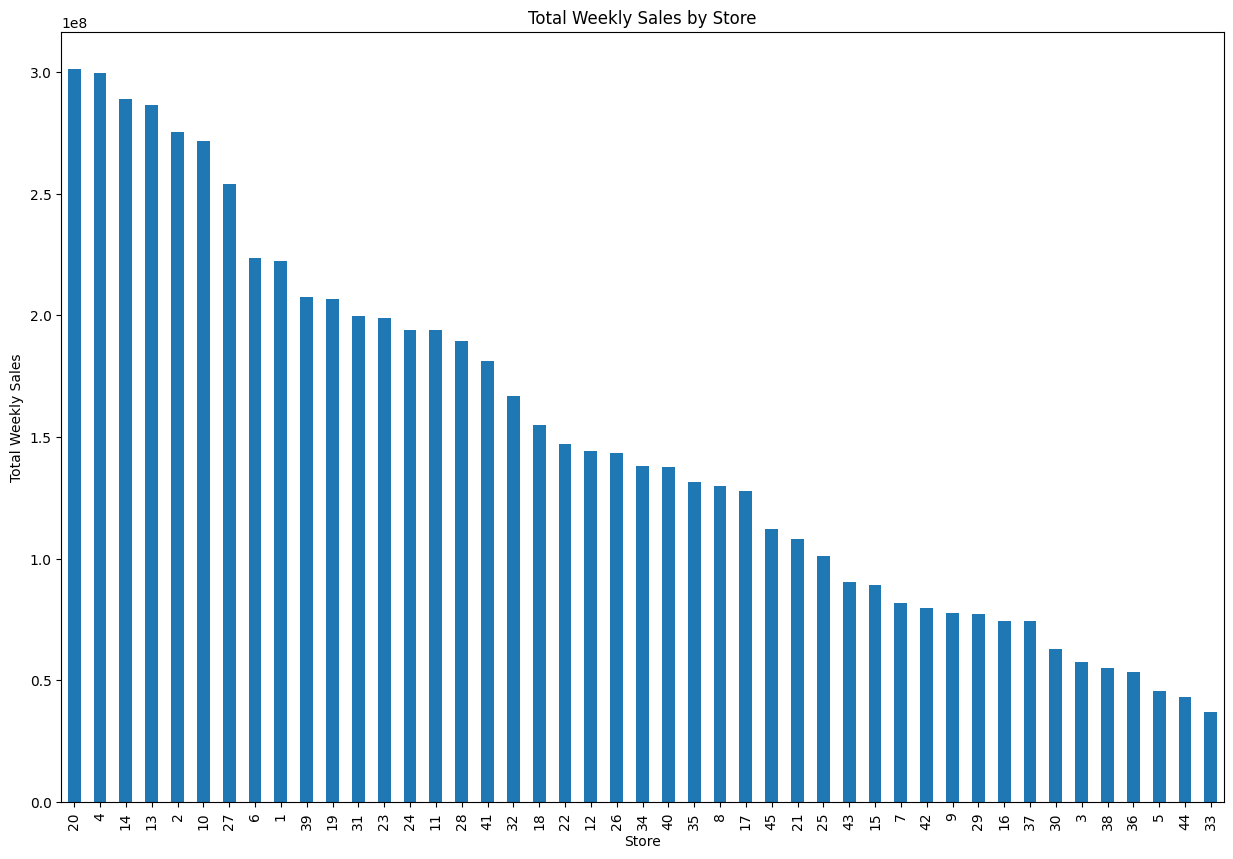

In [19]:
plt.figure(figsize=(15, 10))
store_sales.plot(kind='bar')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()

## Model training

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = walmart_df.drop(['Weekly_Sales', 'Date'], axis=1)
y = walmart_df['Weekly_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                   random_state=101)

In [23]:
y_train

1214     550076.32
4729     923344.54
1583     957997.52
3060     944587.23
2481     891148.55
           ...    
599      286477.35
5695     967729.35
1361    1699708.38
1547    1370251.22
4959    1115255.65
Name: Weekly_Sales, Length: 5148, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
model

LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

rmse1 =np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

526541.1394010964